In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from twitter.twitter_collection import TwitterCollection
from twitter.tweet_sentiment_analyzer import TweetSentimentAnalyzer
from data_pipelines.data_manipulation import DataManipulation

import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

Python-dotenv could not parse statement starting at line 11
[nltk_data] Downloading package stopwords to /home/kozan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
chunksize = 1000000
list_of_dataframes = []
for df in pd.read_csv('btc_archieve/bitcoin-tweets-2021.csv', chunksize=chunksize, lineterminator='\n'):
    list_of_dataframes.append(df)
temp_tweets = pd.concat(list_of_dataframes)

In [3]:
temp_tweets.reset_index(drop=True)

,datetime,username,text
0,2021-01-01 23:59:58+00:00,WoodooProd,Crypto adoption in 2021: Top trends and predic...
1,2021-01-01 23:59:53+00:00,YSojourners,Ripple Executive Says US Laws on Crypto Are Va...
2,2021-01-01 23:59:53+00:00,Andama_n,@hextoysofficial | https://t.co/C6LPpuq05n Are...
3,2021-01-01 23:59:51+00:00,YSojourners,FUN and Games: Altcoin Drastically Pumps And D...
4,2021-01-01 23:59:50+00:00,HunnerSa,I bought #Bitcoin at 6k-8k-9k-12k-16k-19k and ...
...,...,...,...
15630304,2021-12-31 00:00:00+00:00,coins_podcast,"""They don't think that their mighty dollar, fo..."
15630305,2021-12-31 00:00:00+00:00,BTC_AI_bot,Sell Bitcoin $BTC @ 47120.87
15630306,2021-12-31 00:00:00+00:00,kuriharan,Check it. Santo Blockchain to deliver 50 Bitco...
15630307,2021-12-31 00:00:00+00:00,CryptoNerdApp,Current Price of Bitcoin:\n$47192 (1.32%)\n\n$...


In [4]:
l1 = int(len(temp_tweets)/10)
l2 = 9*int(len(temp_tweets)/10)

In [5]:
temp1 = temp_tweets.iloc[:l1,:]

In [6]:
del temp_tweets

In [7]:
temp1.columns = ['created_at', 'username', 'text']
temp1 = temp1[['created_at', 'text', 'username']]

In [8]:
temp1.created_at = pd.to_datetime(temp1.created_at) 
temp1.tail()

,created_at,text,username
1563025,2021-02-05 08:04:40+00:00,@Sephiroth @jack @Allnodes 1 Bitcoin will be e...,IAMWHYGEEY
1563026,2021-02-05 08:04:39+00:00,Small business now accepting Bitcoin https://t...,The_BitCoiner
1563027,2021-02-05 08:04:37+00:00,NYDIG Expects to Hold $25B in Bitcoin for Inst...,The_BitCoiner
1563028,2021-02-05 08:04:35+00:00,PSA: The Elon Musk Bitcoin giveaway scam is no...,The_BitCoiner
1563029,2021-02-05 08:04:33+00:00,$25 Billion Institutional Investors Coming to ...,The_BitCoiner


In [9]:
client_twitter = TwitterCollection()

Authentication Successfull


In [10]:
#client_twitter = TwitterCollection()
#df_btc = client_twitter.get_tweets_df('bitcoin', pathdf='./btc_archieve', filedf='Bitcoin_tweets.csv')

In [11]:
#df_btc.head()

In [12]:
tsa = TweetSentimentAnalyzer()

In [13]:
#df = tsa.cleaning_tweet_data(temp1)

In [14]:
#df = tsa.preprocessing_tweet_datetime(temp1)

In [15]:
df = tsa.get_sentiment_scores(df)

In [ ]:
df.to_csv('btc_sen_1.csv')

In [7]:
tsa.add_datetime_to_col(df)

In [8]:
df_result = tsa.get_sent_with_mean_interval(df, interval='1d')

In [9]:
ohlc = yf.download('BTC-USD', start='2022-10-16', end='2022-11-24', interval='1h')

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Sentiment Score')

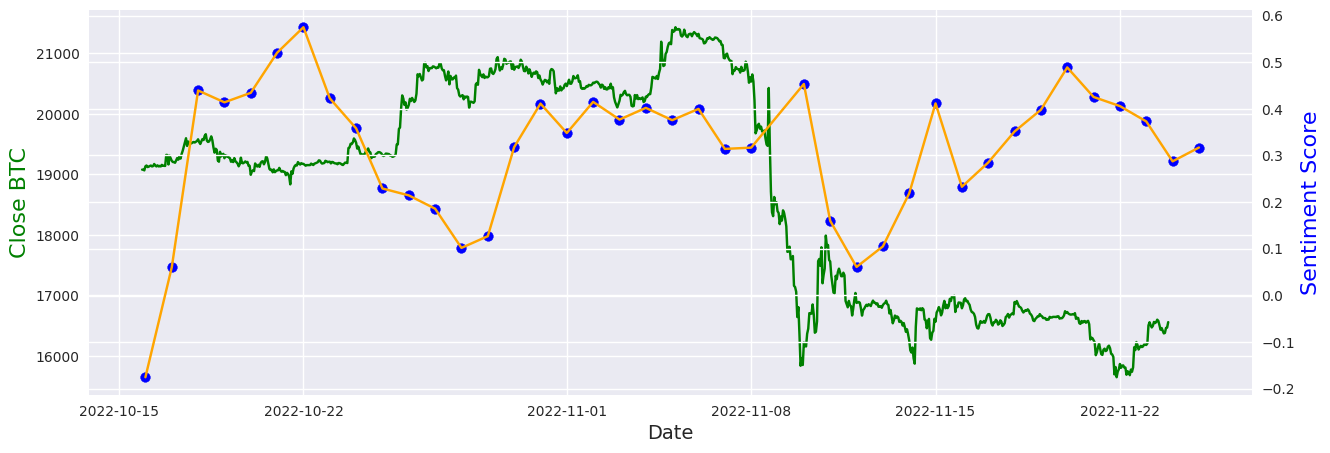

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ohlc.index, ohlc.Close, color='green')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Close BTC', color='green', fontsize=16)

ax2 = ax.twinx()
ax2.scatter(df_result.index, df_result.compound_total, color='blue')
ax2.plot(df_result.index, df_result.compound_total, color='orange')
ax2.set_ylabel('Sentiment Score', color='blue', fontsize=16)

In [11]:
com_words = tsa.get_most_common_words(df, 10)
com_words.style.background_gradient(cmap='Blues')

,Common_words,count
0,0,4211
1,price,4101
2,1,3048
3,btc,2120
4,buy,1790
5,usd,1663
6,5,1656
7,last,1527
8,2,1352
9,follow,1177


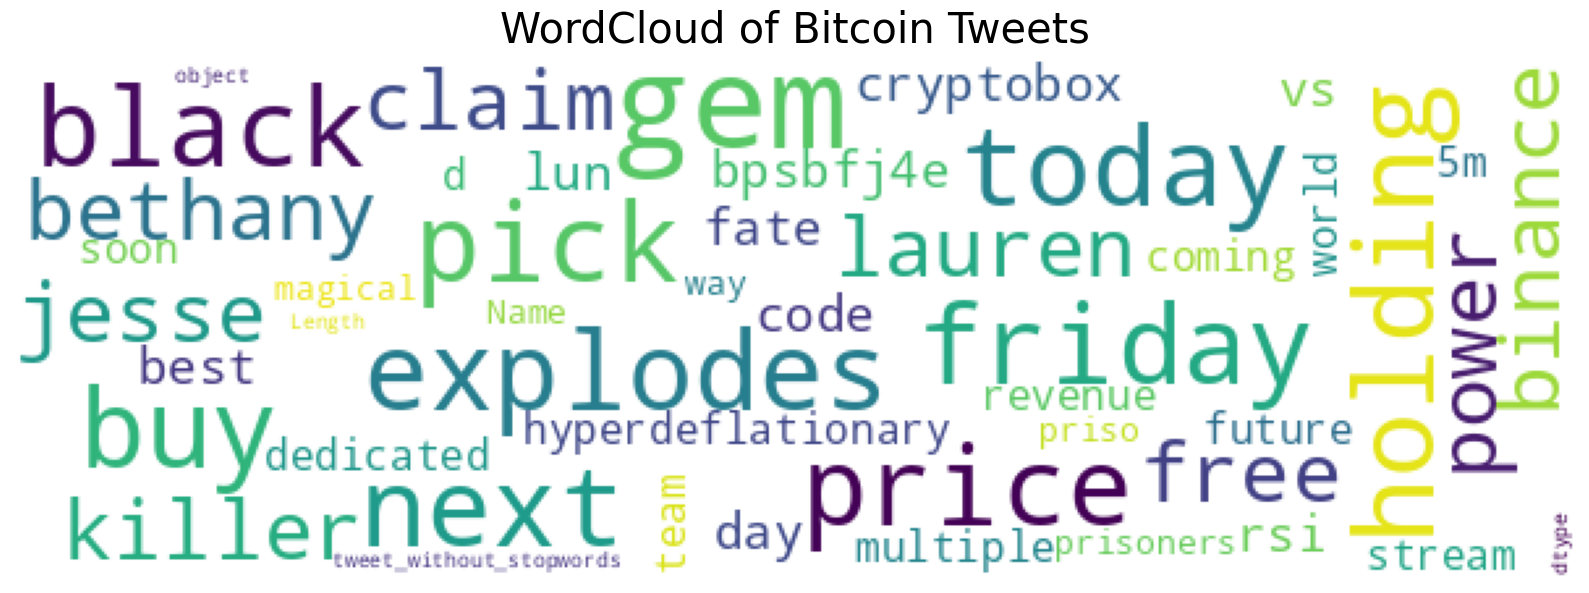

In [12]:
tsa.plot_wordcloud(df['tweet_without_stopwords'],mask=None,color='white',
                max_font_size=50,title_size=30,title="WordCloud of Bitcoin Tweets")